In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special, linalg
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

In [2]:
phix = np.pi
lq = 3
S = 500 #размерность матрицы   
S_test = 1000
 
# параметры графика
width = 8
high = 6

In [3]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh

# используем в основном a_crtn + a_anh = a
def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a

In [4]:
cosA = linalg.cosm(np.sqrt(lq/2)*a(S))#np.sqrt(lq/2)*a(S))

In [5]:
cosA_test = linalg.cosm(np.sqrt(lq/2)*a(S_test))

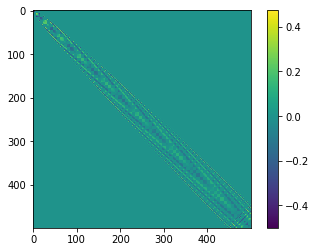

In [6]:
# вырисовка матрицы косинуса
plt.imshow(cosA)
plt.colorbar()
plt.show()

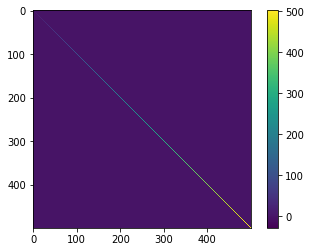

In [7]:
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - (phix/np.sqrt(2*lq))*a(S) - cosA
H_test = N(S_test) + (3/2 + phix**2/(2*lq))*np.eye(S_test) - (phix/np.sqrt(2*lq))*a(S_test) - cosA_test

#----------------------------------------------------
# вырисовка матрицы гамильтониана
plt.imshow(H)
plt.colorbar()
plt.show()

In [19]:
# тут будет матрица координатная
S_coor = 5000
dx = 0.01 
L = dx*(S_coor+2)# длина ящика для нулевых краевых условий
phix = np.pi #при построение потенциала обл определения должна сдвигаться на phi
x = np.linspace(-L/2+dx+phix, L/2-dx+phix, S_coor) # список x_i от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
print('dx = {}, L = {}'.format(dx, L))
def U(phi):
    return (phix - phi)**2/(2*lq) + 1 - np.cos(phi)

v = U(x)
h = np.zeros((S_coor,S_coor))
for i in range(S_coor-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S_coor):
    h[i][i] = 2*k + v[i]

dx = 0.01, L = 50.02


In [20]:
eigvals_coor, eigvecs_coor = linalg.eigh(h)

In [21]:
eigvals, eigvecs = linalg.eigh(H)

In [22]:
eigvals_test, eigvecs_test = linalg.eigh(H_test)

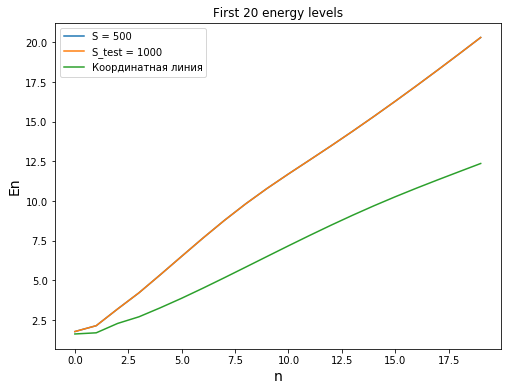

In [55]:
en_plot_num = 20
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], label="S = {}".format(S))
plt.plot(eigvals_test[:en_plot_num], label="S_test = {}".format(S_test))
plt.plot(eigvals_coor[:en_plot_num], label="Координатная линия")
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

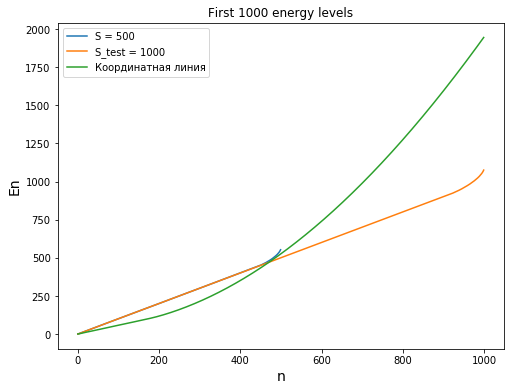

In [54]:
en_plot_num = S_test
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], label="S = {}".format(S))
plt.plot(eigvals_test[:en_plot_num], label="S_test = {}".format(S_test))
plt.plot(eigvals_coor[:en_plot_num], label="Координатная линия")
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

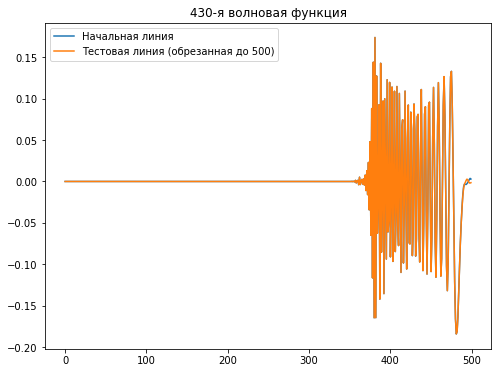

In [49]:
num = 430
plt.figure(figsize=(width, high))
plt.plot(eigvecs[:,num],label="Начальная линия") 
plt.plot(eigvecs_test[:S,num],label="Тестовая линия (обрезанная до {})".format(S)) 
plt.legend()
plt.title('{}-я волновая функция'.format(num))
plt.show()

Вывод:
Тестовая и обычная функции одних номеров совпадают по форме (в рамках тех номеров, где энергии совпадают).